In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/Position_Salaries.csv')

In [4]:
data.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
data.shape

(10, 3)

In [6]:
X = data.iloc[:,1].values
y = data.iloc[:,2].values

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [15]:
from sklearn.svm import SVR
model_svm = SVR(kernel='rbf')
model_svm.fit(X=X_train,y=y_train)

c:\users\prabhatbara\desktop\iitbombay\hackathons\ps1\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [16]:
y_pred = model_svm.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test,y_pred=y_pred)
print('The r2 score of the model is {}'.format(round(r2,4)))

The r2 score of the model is 0.9445


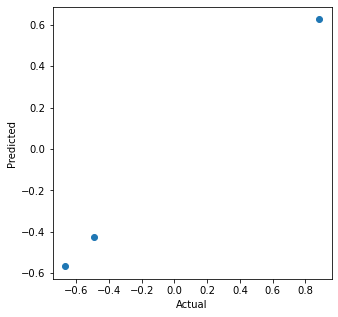

In [21]:
fig = plt.figure(figsize=(5,5))
gs = fig.add_gridspec(1,1)

ax1 = fig.add_subplot(gs[0,0])
ax1 = plt.scatter(x=y_test,y=y_pred)
ax1 = plt.xlabel('Actual')
ax1 = plt.ylabel('Predicted')
plt.show()